<a href="https://colab.research.google.com/github/Shashank123-hub/MachineLearning/blob/master/Celsius_to_farenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is a training model for converting Celsius to Farenheit in accordance to the formula :**

# F = C * 1.8 + 32

where F = Farenheit values

and C = Celsius values

# **Step 1 : Importing all dependancies**


> This step involves importing all dependencies into our model like **TensorFlow** , **numPy** and other computational dependencies.




In [0]:
from __future__ import absolute_import, division , print_function,unicode_literals

#Above are all dependencies

In [0]:
try:
  %tensorflow_version 2.x  #This version is supported in Colab.
except Exception:
  pass

import tensorflow as tf    #Importing TensorFlow

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  #This version is supported in Colab.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import numpy as np    #Importing numpy
import logging     #Importing logging module
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# **Step 2 : Setting up training data**

> The goal of this step is to provide the training data to our model that we want to train. Since this is a supervised learning case, we provide inputs OR ***Features*** and corresponding outputs OR ***Labels***. 

> Here the input values will be a list of Celsius value and output will be a list of corresponding Farenheit values. A pair of such input/outpur values is known as an ***Example***.










In [0]:
celsius_c = np.array([-40 , -10 , 0 , 8 , 15 , 22 , 38], dtype = float)
farenheit_f = np.array([-40 , 14 , 32 , 46 , 59 , 72 , 100], dtype = float)

for i,c in enumerate(celsius_c):   #To print the values of Celsius and Farenheit
  print("{} degrees Celsius = {} degrees Farenheit".format(c, farenheit_f[i]))

-40.0 degrees Celsius = -40.0 degrees Farenheit
-10.0 degrees Celsius = 14.0 degrees Farenheit
0.0 degrees Celsius = 32.0 degrees Farenheit
8.0 degrees Celsius = 46.0 degrees Farenheit
15.0 degrees Celsius = 59.0 degrees Farenheit
22.0 degrees Celsius = 72.0 degrees Farenheit
38.0 degrees Celsius = 100.0 degrees Farenheit


# **Step 3 : Build the model**

> Since, our problem is simple and straightforward, we'll use a single layer in the model with a single neuron known as the ***Dense layer***.

**Building the layer :**


> We'll call the layer 10 and create it by instantiating ***tf.keras.layers.Dense*** with the following parameters :

=> input_shape=[1] : This specifies that the input to this layer is a single value i.e the shape is one-dimensional array with one member.

=> units=1 : This specifies the number of neurons in the layer.Since this is the final layer, it is also the size of model's output(a single float value representing Farenheit values).





In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) #This creates the layer.
print('The layer has been created.')

The layer has been created.


# **Step 4 : Assemble the layer into the model**

> After the layer is defined, it needs to be assembled into the model. We will use the Sequential model for this.



In [0]:
 model = tf.keras.Sequential([l0])
 print('The model has been created.')

The model has been created.


# **Step 5 : Compiling the model with loss and optimizer functions**

> Before training, the model needs to be compiled with respect to the following attributes:

=> **Loss function** : A way of measuring how far predictions are from desired output values.

=> **Optimizer function** : A way of adjusting internal values in order to reduce loss.


The loss function(**mean squared error**) and the optimizer(**Adam**) used are the standard for simple model like this one, but many more are available.

Value of Optimizer needs to be set in accordance to the loss rate. The value usually ranges between 0.001 and 0.1 where 0.001 is the default value


In [0]:
 model.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.Adam(0.1)) #Corresponding loss and optimizer functions.
 print('The model has been compiled.')

The model has been compiled.


# **Step 6 : Training the model**

> Training can be done by calling the ***fit*** method.

Here, the ***epochs*** argument specifies how many times the cycle should run in the training process for calculating, comparing and adjusting the value to loss functions and the ***verbose*** argument controls how much output the method produces.



In [0]:
history = model.fit(celsius_c , farenheit_f , epochs=500 , verbose=False)  #Defining the epochs and verbose arguments.
print("Training of the model has been done.")

Training of the model has been done.


# **Step 7 : Displaying the training statistics**

> This optional step involves plotting how loss goes down after each training epoch/cycle. This is done on the basis of history object from the previous method. 

>We'll use ***Matplotlib*** to visualize this. We can see the plot improves consistently until to almost perfect in the end.



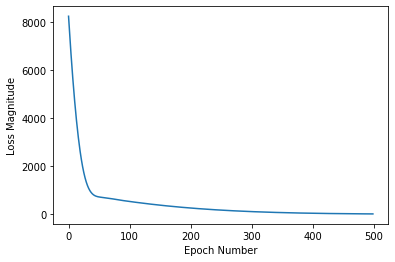

In [0]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")  #Representing the x Label of the graph.
plt.ylabel("Loss Magnitude")  #Representing the y label of the graph.
plt.plot(history.history['loss'])

# **Final Step : Use the model to predict the values**


> Now that the training has been completed, the final step is to ensure that our model has learned efficiently and produces the correct output.

> For this, we provide a random input value and see if the model gives the correct output values in accordance the defined formula.





In [0]:
print(model.predict([100.0]))  #Providing our own input value to check.

[[211.27579]]
